In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
import matplotlib as mpl
from matplotlib import cm
from matplotlib.dates import date2num
import datetime
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [63]:
cities = pd.read_csv("datasets/cities_r2.csv")

In [64]:
cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [65]:
cities.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [66]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

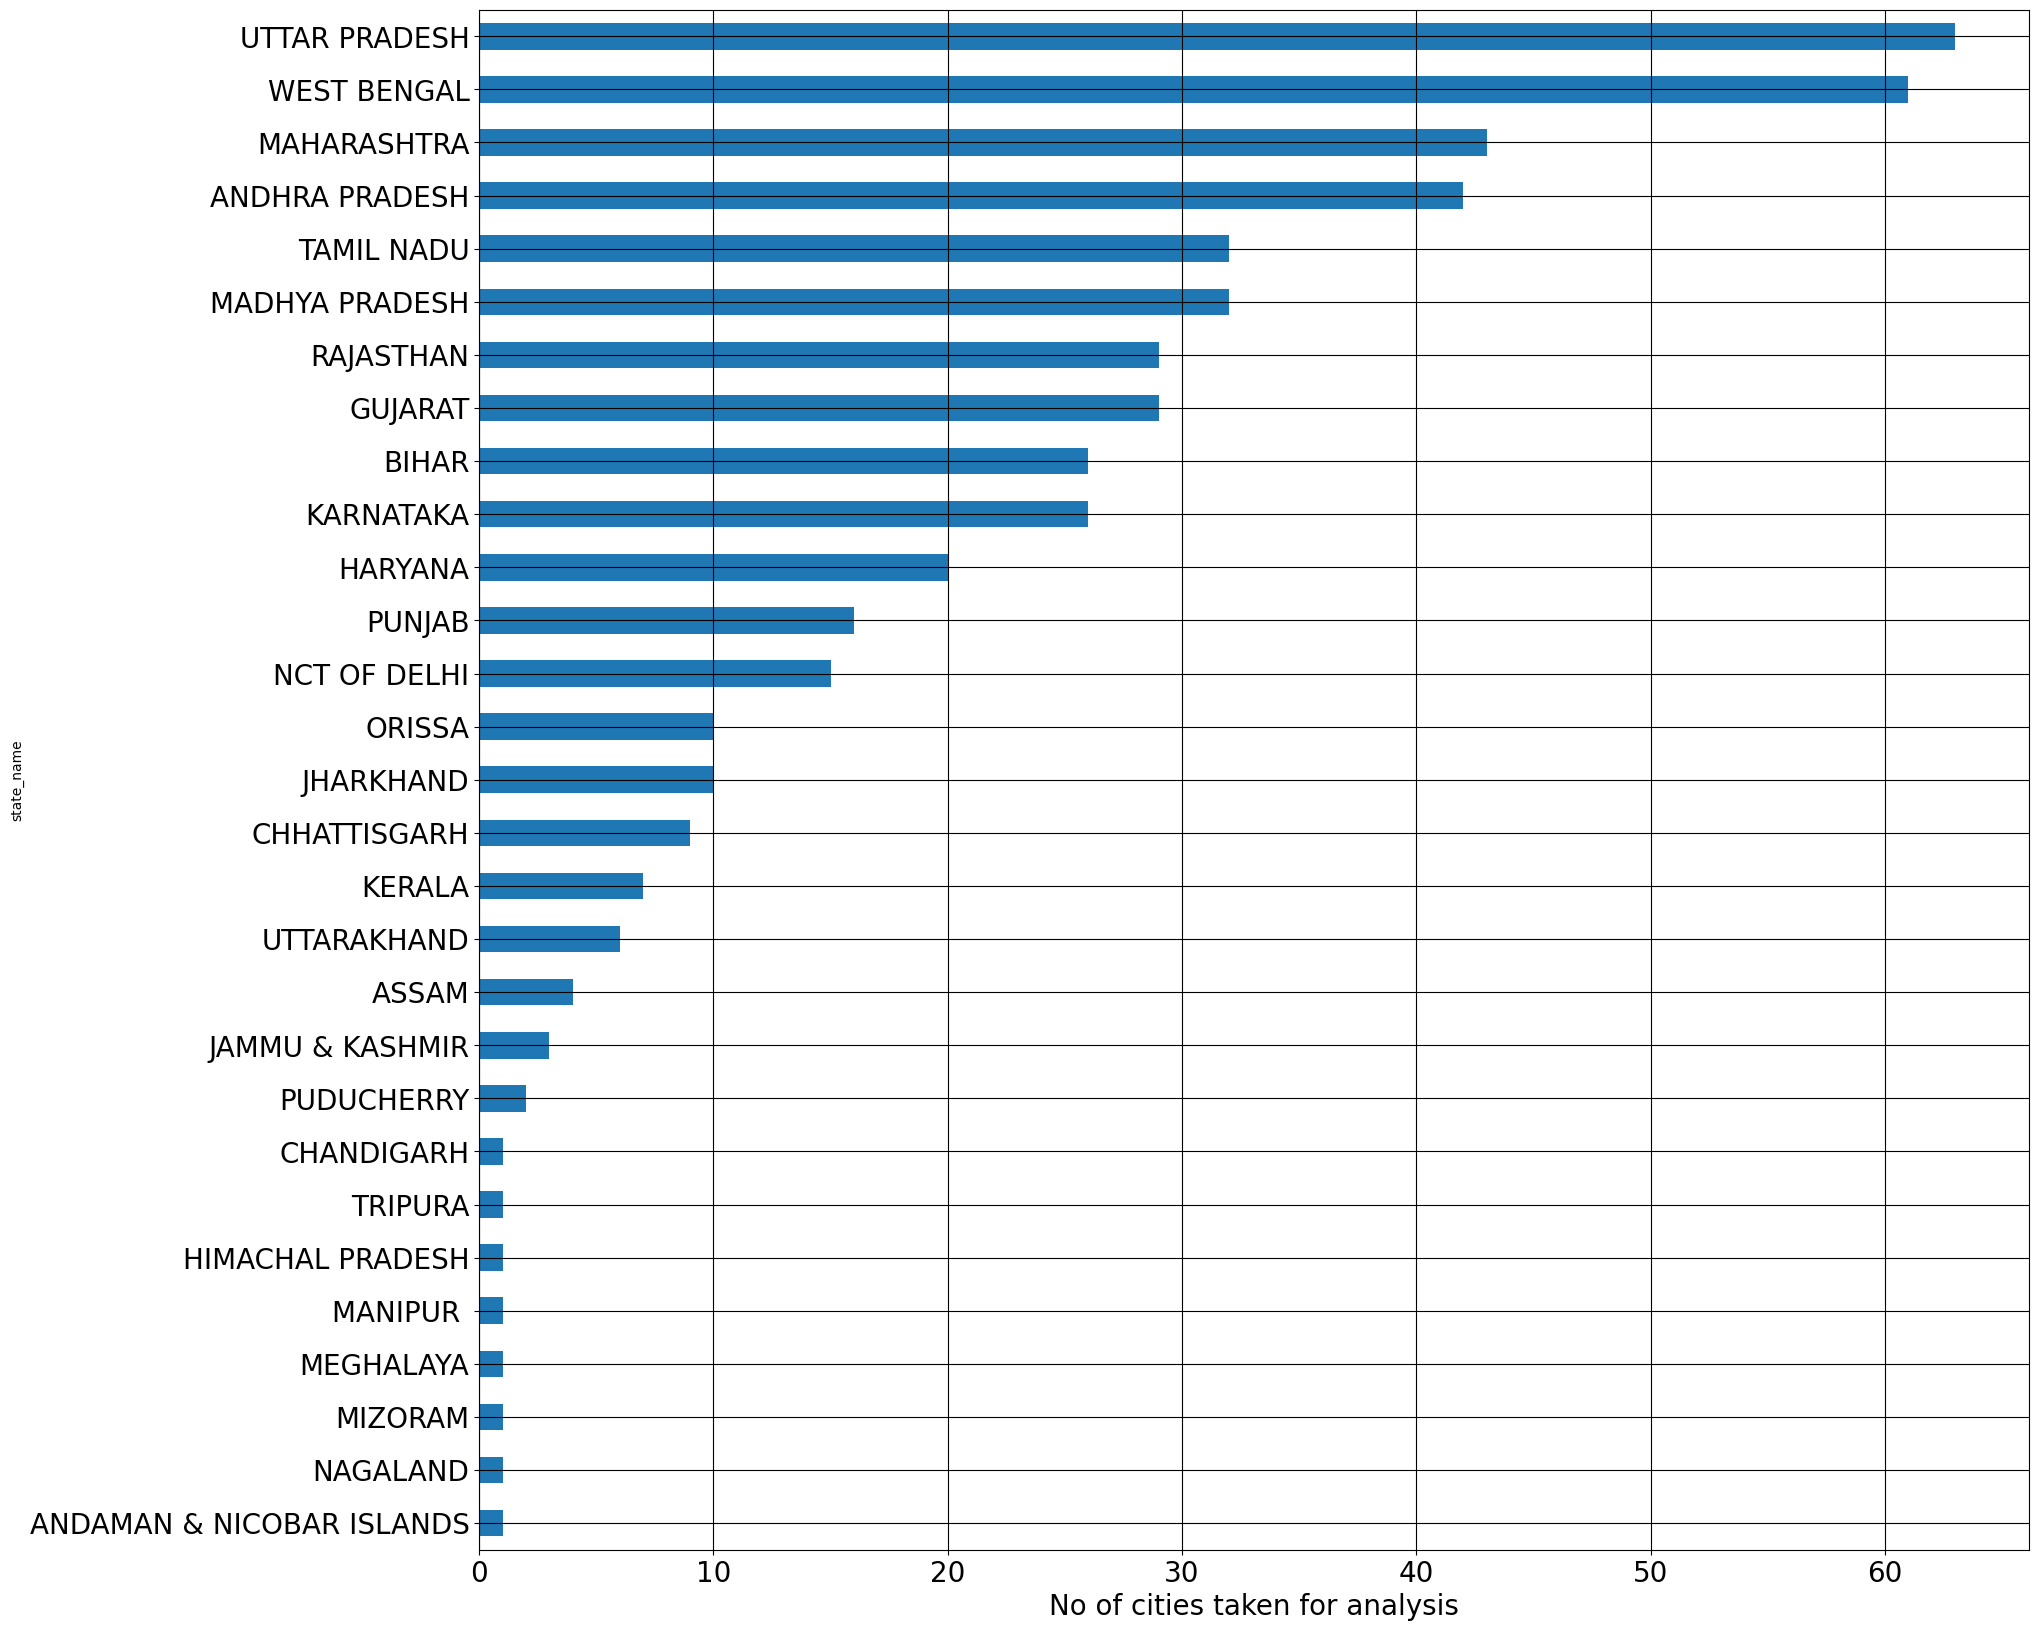

In [67]:
# A bar chart to show from which states, how many cities are taken for examination.
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(visible=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()
# we can see states like UP and WB are given high priority by taking more than 60 cities.

In [68]:
cities['latitude'] = cities['location'].apply(lambda x: x.split(',')[0])
cities['longitude'] = cities['location'].apply(lambda x: x.split(',')[1])
cities.head(1)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,latitude,longitude
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,30.1452928,74.1993043


In [69]:
# A table to show top 10 cities with most population
print("The Top 10 Cities sorted according to the Total Population (Descending Order)")
top_pop_cities = cities.sort_values(by='population_total',ascending=False)
top10_pop_cities=top_pop_cities.head(10)
top10_pop_cities

The Top 10 Cities sorted according to the Total Population (Descending Order)


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,latitude,longitude
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407,19.0760,72.8777
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097,28.7041,77.1025
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800,12.9716,77.5946
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747,17.3850,78.4867
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591,23.022505,72.5713621
119,Chennai,33,TAMIL NADU,2,4681087,2357633,2323454,418541,213084,205457,...,964,90.33,93.47,87.16,"13.0826802,80.2707184",879695,487428,392267,13.0826802,80.2707184
274,Kolkata,19,WEST BENGAL,16,4486679,2362662,2124017,300052,155475,144577,...,930,87.14,89.08,84.98,"22.572646,88.363895",818476,461615,356861,22.572646,88.363895
449,Surat,24,GUJARAT,25,4462002,2538243,1923759,531522,293208,238314,...,813,89.03,92.76,84.05,"21.1702401,72.8310607",278795,160566,118229,21.1702401,72.8310607
380,Pune,27,MAHARASHTRA,25,3115431,1602137,1513294,324572,171152,153420,...,896,91.61,95.13,87.91,"18.5204303,73.8567437",656508,349022,307486,18.5204303,73.8567437
225,Jaipur,8,RAJASTHAN,12,3073350,1619280,1454070,378788,204320,174468,...,854,84.34,90.61,77.41,"26.9124336,75.7872709",533148,319107,214041,26.9124336,75.7872709


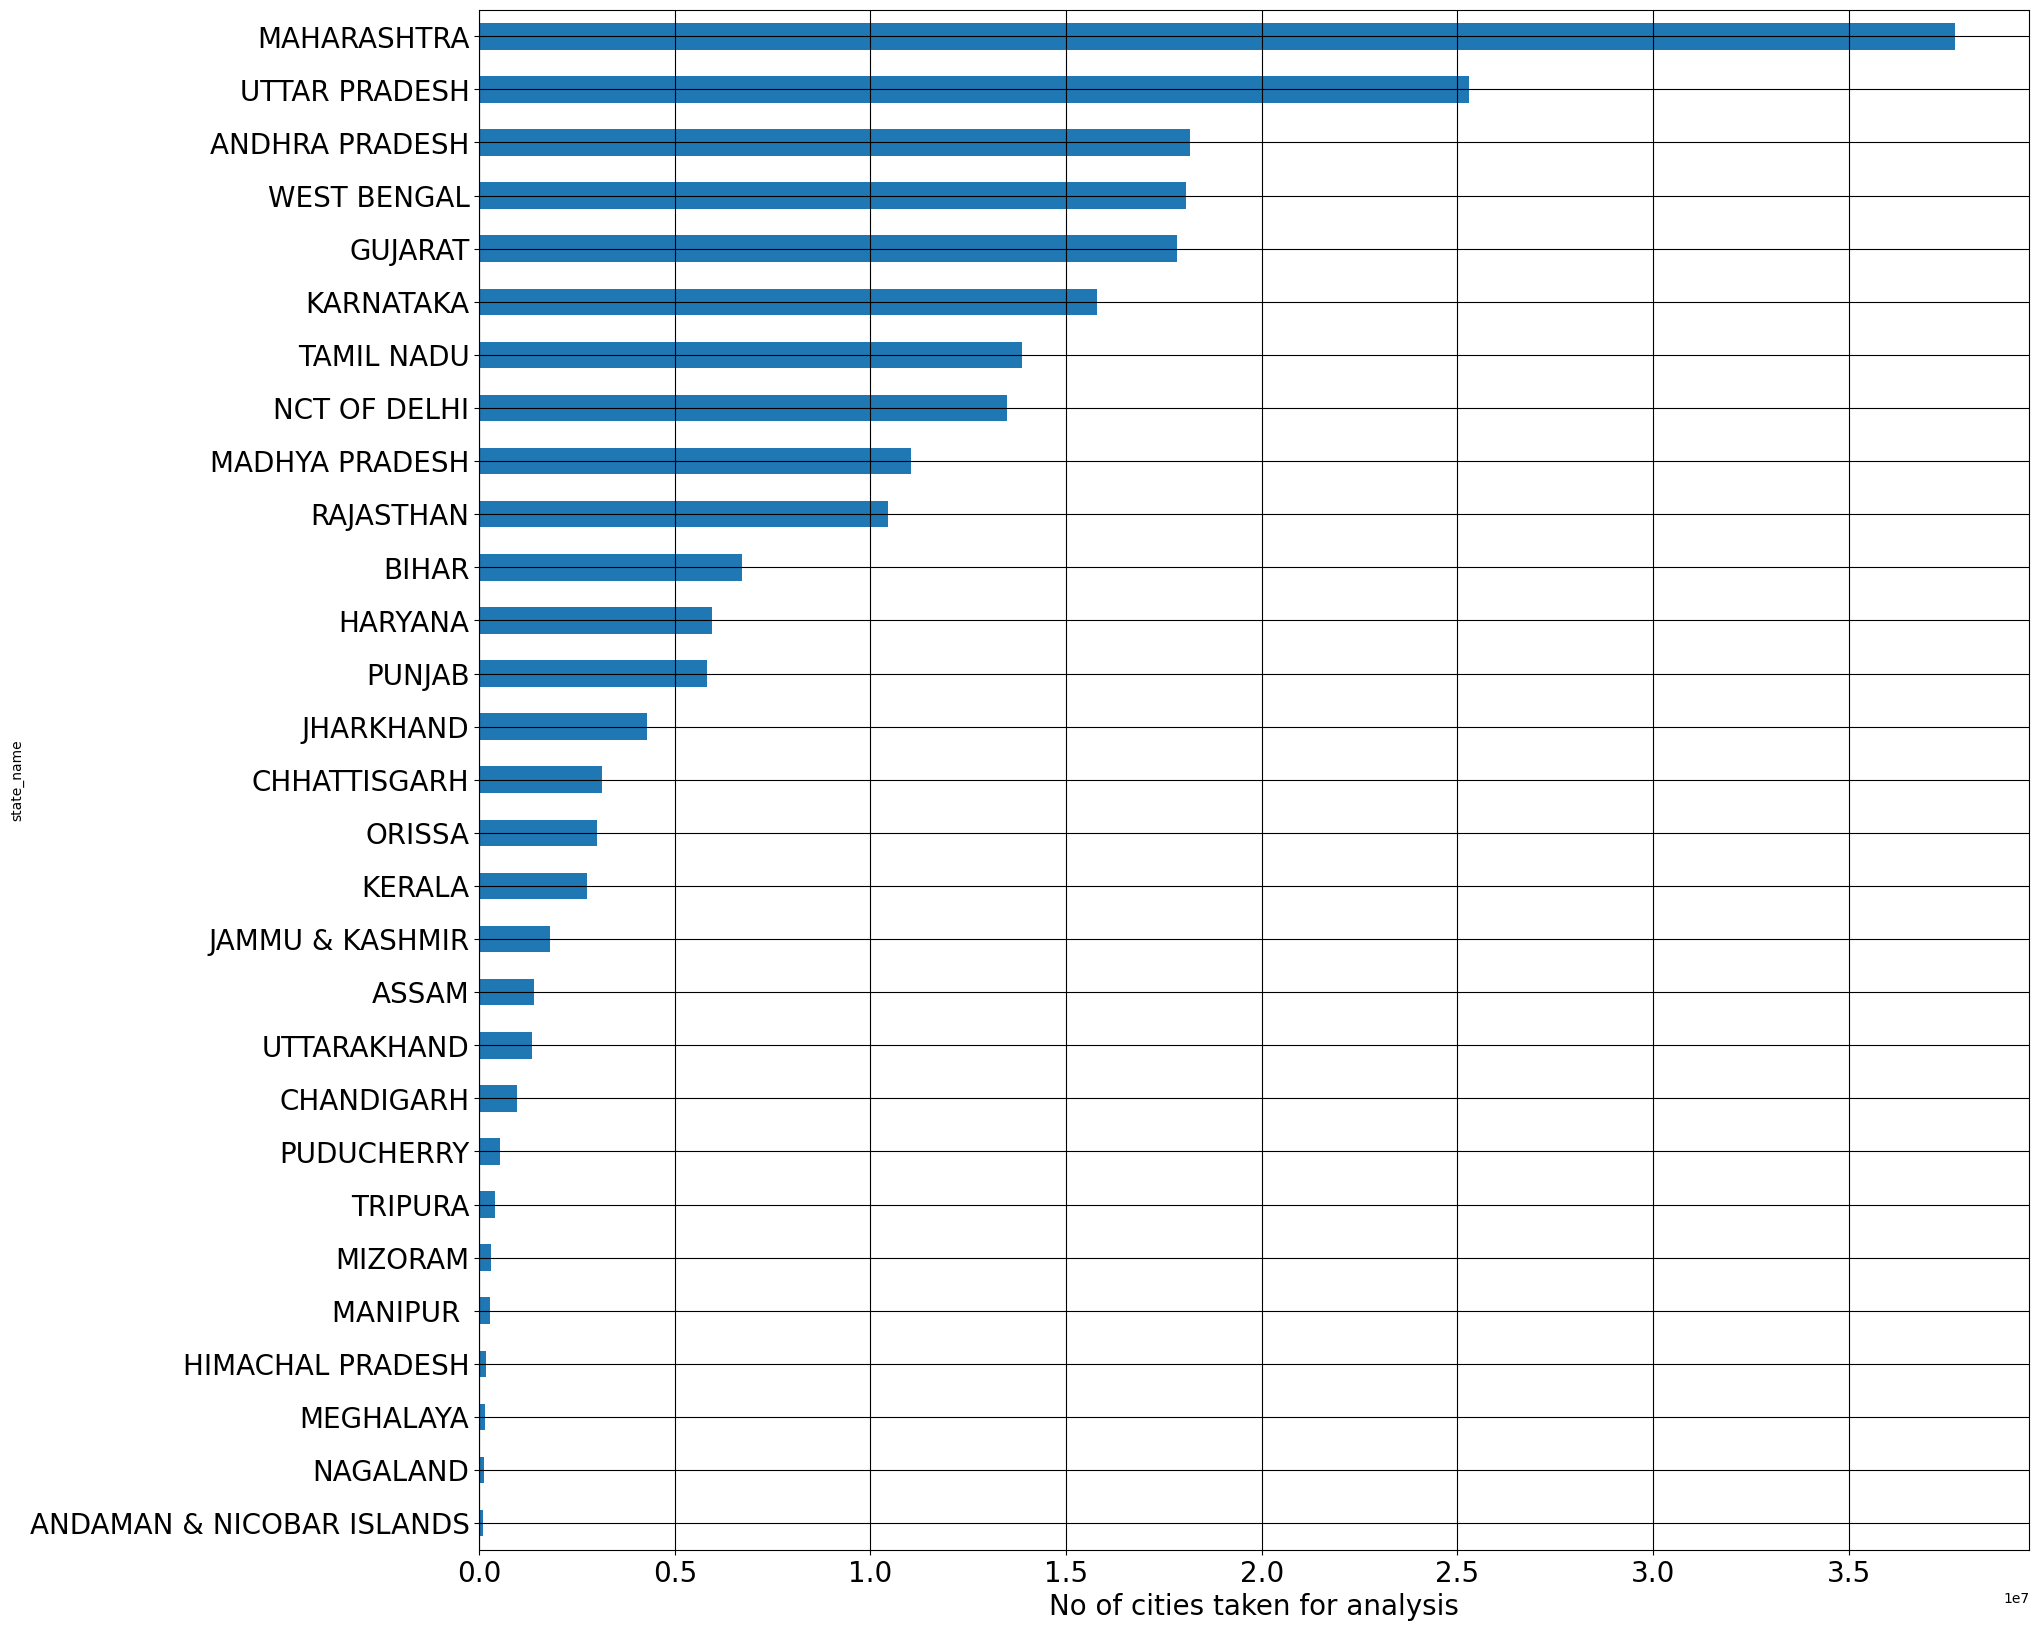

In [70]:
# A bar chart to show the population of the states
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['population_total'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(visible=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()
# we can see states like Maharashtra and UP have huge urban population

In [71]:
lengthOfNH = pd.read_csv("datasets/Length_of_National_Highways.csv")
totalRoadLength = pd.read_csv("datasets/Total_Road_Length_by_Category_of_Roads.csv")
ruralRoads = pd.read_csv("datasets/Total_and_Surfaced_Length_of_Rural_Roads.csv")

In [72]:
lengthOfNH.describe()

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,37.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,35.000000,36.000000
mean,18.000000,3973.878788,3973.878788,4035.757576,4035.757576,4045.696970,4275.636364,4299.030303,4275.636364,4655.606061,4794.909091,5216.400000,5443.944444
std,10.824355,11193.360654,11193.360654,11364.041999,11364.041999,11391.490537,12035.209626,12102.014041,12035.209626,13113.071150,13502.939595,15158.528295,16033.948026
min,0.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,22.000000,15.000000
25%,9.000000,494.000000,494.000000,494.000000,494.000000,494.000000,810.000000,810.000000,810.000000,1027.000000,1027.000000,625.000000,954.250000
50%,18.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1805.000000,1805.000000,1805.000000,2027.000000,2027.000000,2196.000000,2553.000000
75%,27.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,4105.000000,4416.000000,4622.000000,4677.750000
max,36.000000,65569.000000,65569.000000,66590.000000,66590.000000,66754.000000,70548.000000,70934.000000,70548.000000,76818.000000,79116.000000,91287.000000,97991.000000


In [73]:
lengthOfNH.head(5)

,Unnamed: 0,States/UTs,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,Andhra Pradesh,4472.0,4472.0,4472.0,4472.0,4472.0,4537.0,4537.0,4537.0,4537.0,5022.0,6590.0,4670.0
1,1,Arunachal Pradesh,392.0,392.0,392.0,392.0,392.0,1992.0,1992.0,1992.0,2027.0,2027.0,2027.0,2513.0
2,2,Assam,2836.0,2836.0,2836.0,2836.0,2836.0,2836.0,2836.0,2836.0,2940.0,2940.0,3634.0,3784.0
3,3,Bihar,3537.0,3537.0,3642.0,3642.0,3642.0,3642.0,3642.0,3642.0,4105.0,4168.0,4467.0,4701.0
4,4,Chhattisgarh,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2289.0,2289.0,3031.0,3079.0


In [74]:
lengthOfNH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37 non-null     int64  
 1   States/UTs  37 non-null     object 
 2   2004        33 non-null     float64
 3   2005        33 non-null     float64
 4   2006        33 non-null     float64
 5   2007        33 non-null     float64
 6   2008        33 non-null     float64
 7   2009        33 non-null     float64
 8   2010        33 non-null     float64
 9   2011        33 non-null     float64
 10  2012        33 non-null     float64
 11  2013        33 non-null     float64
 12  2014        35 non-null     float64
 13  2015        36 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 4.2+ KB


In [75]:
totalRoadLength.describe()

,Unnamed: 0,Year (As On 31st March),National Highways : Length In Kms,National Highways : Length In Percentage,State Highways : Length In Kms,State Highways : Length In Percentage,Other PWD Roads : Length In Kms,Other PWD Roads : Length In Percentage,Panchayat Raj Roads : Length In Kms,Panchayat Raj Roads : Length In Percentage,JRY & PMGSY Roads : Length In Kms,JRY & PMGSY Roads : Length In Percentage,Urban Roads : Length In Kms,Urban Roads : Length In Percentage,Project Roads : Length In Kms,Project Roads : Length In Percentage,Surfaced : Length In Kms,Surfaced : Length In Percentage,Total : Length In Kms,Total : Length In Percentage
count,20.00000,20.000000,20.000000,20.000000,18.000000,20.00000,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,1.900000e+01,19.0
mean,9.50000,1998.750000,59771.456500,2.024500,142753.313833,3.59900,7.493187e+05,24.189000,1.187647e+06,35.441500,8.639922e+05,20.387500,277305.151895,7.735263,226286.475737,6.645263,1.753899e+06,49.805263,3.402571e+06,100.0
std,5.91608,18.372964,22191.519619,0.966521,28773.884014,1.53767,2.867961e+05,8.056611,4.979577e+05,4.730227,5.109653e+05,10.825361,138886.248567,1.969832,90587.846748,3.255055,9.065372e+05,5.141973,1.550970e+06,0.0
min,0.00000,1951.000000,19811.000000,1.450000,56765.000000,0.00000,1.737230e+05,19.750000,1.971940e+05,31.660000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.570190e+05,39.260000,3.999420e+05,100.0
25%,4.75000,1998.500000,51715.250000,1.580000,133584.500000,3.34250,6.488600e+05,20.365000,1.033837e+06,32.942500,7.602825e+05,22.225000,218547.000000,7.500000,216701.000000,6.055000,1.345956e+06,47.305000,2.850441e+06,100.0
50%,9.50000,2005.500000,66079.500000,1.695000,150162.500000,3.72000,7.949495e+05,21.010000,1.308860e+06,33.625000,9.784215e+05,25.665000,297259.000000,8.290000,261625.000000,6.570000,1.795298e+06,48.490000,3.809156e+06,100.0
75%,14.25000,2010.250000,70934.000000,1.795000,162967.750000,3.84500,9.827842e+05,21.837500,1.521245e+06,35.035000,1.185607e+06,26.402500,388124.988000,8.500000,277774.019500,7.020000,2.378658e+06,52.535000,4.526974e+06,100.0
max,19.00000,2015.000000,97991.120000,4.950000,170818.135000,6.35000,1.101178e+06,49.020000,1.831043e+06,51.610000,1.506212e+06,27.830000,464294.000000,9.540000,310955.000000,14.310000,3.220502e+06,60.610000,5.402486e+06,100.0


In [76]:
totalRoadLength.head(10)

,Unnamed: 0,Year (As On 31st March),National Highways : Length In Kms,National Highways : Length In Percentage,State Highways : Length In Kms,State Highways : Length In Percentage,Other PWD Roads : Length In Kms,Other PWD Roads : Length In Percentage,Panchayat Raj Roads : Length In Kms,Panchayat Raj Roads : Length In Percentage,JRY & PMGSY Roads : Length In Kms,JRY & PMGSY Roads : Length In Percentage,Urban Roads : Length In Kms,Urban Roads : Length In Percentage,Project Roads : Length In Kms,Project Roads : Length In Percentage,Surfaced : Length In Kms,Surfaced : Length In Percentage,Total : Length In Kms,Total : Length In Percentage
0,0,1951,19811.0,4.95,NaN,0.00,173723.0,43.44,206408.0,51.61,0.0,0.00,0.0,0.00,0.0,0.00,157019.0,39.26,399942.0,100.0
1,1,1961,23798.0,4.54,NaN,0.00,257125.0,49.02,197194.0,37.60,0.0,0.00,46361.0,8.84,0.0,0.00,263052.0,50.16,524478.0,100.0
2,2,1971,23838.0,2.61,56765.0,6.20,276833.0,30.26,354530.0,38.75,0.0,0.00,72120.0,7.88,130893.0,14.31,397948.0,43.49,914979.0,100.0
3,3,1981,31671.0,2.13,94359.0,6.35,421895.0,28.40,628865.0,42.34,0.0,0.00,123120.0,8.29,185511.0,12.49,683676.0,46.03,1485421.0,100.0
4,4,1991,33650.0,1.45,127311.0,5.47,509435.0,21.89,931288.0,40.01,329142.0,14.14,186799.0,8.03,209737.0,9.01,1090167.0,46.84,2327362.0,100.0
5,5,2001,57737.0,1.71,132100.0,3.92,736001.0,21.82,1068020.0,31.66,903996.0,26.80,252001.0,7.47,223665.0,6.63,1601745.0,47.48,3373520.0,100.0
6,6,2002,58112.0,1.70,137711.0,4.02,695335.0,20.29,1134326.0,33.10,926697.0,27.04,250295.0,7.30,224124.0,6.54,1661555.0,48.49,3426600.0,100.0
7,7,2003,58112.0,1.65,134807.0,3.82,696960.0,19.75,1155491.0,32.75,926697.0,26.26,297259.0,8.42,259328.0,7.35,1701258.0,48.21,3528654.0,100.0
8,8,2004,65569.0,1.81,133177.0,3.68,719257.0,19.86,1189058.0,32.83,951511.0,26.27,301310.0,8.32,261625.0,7.22,1760768.0,48.62,3621507.0,100.0
9,9,2005,65569.0,1.72,144396.0,3.79,786230.0,20.64,1299463.0,34.11,966976.0,25.39,286707.0,7.53,259815.0,6.82,1795298.0,47.13,3809156.0,100.0


In [77]:
totalRoadLength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  20 non-null     int64  
 1   Year (As On 31st March)                     20 non-null     int64  
 2   National Highways : Length In Kms           20 non-null     float64
 3   National Highways : Length In Percentage    20 non-null     float64
 4   State Highways : Length In Kms              18 non-null     float64
 5   State Highways : Length In Percentage       20 non-null     float64
 6   Other PWD Roads : Length In Kms             20 non-null     float64
 7   Other PWD Roads : Length In Percentage      20 non-null     float64
 8   Panchayat Raj Roads : Length In Kms         20 non-null     float64
 9   Panchayat Raj Roads : Length In Percentage  20 non-null     float64
 10  JRY & PMGSY Road

In [78]:
ruralRoads.describe()

,Unnamed: 0,Total,Surfaced
count,32.000000,3.200000e+01,3.200000e+01
mean,15.500000,1.523284e+05,9.287931e+04
std,9.380832,4.249865e+05,2.605656e+05
min,0.000000,2.930000e+02,1.110000e+02
25%,7.750000,1.061675e+04,6.282000e+03
50%,15.500000,4.896150e+04,2.424600e+04
75%,23.250000,1.663982e+05,7.242975e+04
max,31.000000,2.437255e+06,1.486069e+06


In [79]:
ruralRoads.head(5)

,Unnamed: 0,State/ UT Name,Total,Surfaced
0,0,Andhra Pradesh,112787,62878
1,1,Arunachal Pradesh,11217,6330
2,2,Assam,255389,27670
3,3,Bihar,175373,84794
4,4,Chhattisgarh,35048,29909


In [80]:
ruralRoads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32 non-null     int64 
 1   State/ UT Name  32 non-null     object
 2   Total           32 non-null     int64 
 3   Surfaced        32 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


# Analysis on total road length based on year, perform linear regression to predict values up to 2022 and take past 5 years values as comparison to initial 5 years from the dataset

In [84]:
lengthOfNH.describe()

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,37.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,35.000000,36.000000
mean,18.000000,3973.878788,3973.878788,4035.757576,4035.757576,4045.696970,4275.636364,4299.030303,4275.636364,4655.606061,4794.909091,5216.400000,5443.944444
std,10.824355,11193.360654,11193.360654,11364.041999,11364.041999,11391.490537,12035.209626,12102.014041,12035.209626,13113.071150,13502.939595,15158.528295,16033.948026
min,0.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,22.000000,15.000000
25%,9.000000,494.000000,494.000000,494.000000,494.000000,494.000000,810.000000,810.000000,810.000000,1027.000000,1027.000000,625.000000,954.250000
50%,18.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1805.000000,1805.000000,1805.000000,2027.000000,2027.000000,2196.000000,2553.000000
75%,27.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,4105.000000,4416.000000,4622.000000,4677.750000
max,36.000000,65569.000000,65569.000000,66590.000000,66590.000000,66754.000000,70548.000000,70934.000000,70548.000000,76818.000000,79116.000000,91287.000000,97991.000000


In the count section we can see irregularities with the main unnamed section and other years, so we can drop NA values from the table

In [85]:
lengthOfNH = lengthOfNH.dropna()

In [86]:
lengthOfNH.describe()

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.515152,3973.878788,3973.878788,4035.757576,4035.757576,4045.696970,4275.636364,4299.030303,4275.636364,4655.606061,4794.909091,5530.939394,5855.818182
std,10.440669,11193.360654,11193.360654,11364.041999,11364.041999,11391.490537,12035.209626,12102.014041,12035.209626,13113.071150,13502.939595,15567.813653,16701.577222
min,0.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,15.000000
25%,8.000000,494.000000,494.000000,494.000000,494.000000,494.000000,810.000000,810.000000,810.000000,1027.000000,1027.000000,1171.000000,1204.000000
50%,16.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1805.000000,1805.000000,1805.000000,2027.000000,2027.000000,2282.000000,2593.000000
75%,25.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,4105.000000,4416.000000,4694.000000,4701.000000
max,36.000000,65569.000000,65569.000000,66590.000000,66590.000000,66754.000000,70548.000000,70934.000000,70548.000000,76818.000000,79116.000000,91287.000000,97991.000000


After dropping the NA values we notice all have a constant count of 33

In [88]:
lengthOfNH.head(33)

,Unnamed: 0,States/UTs,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,Andhra Pradesh,4472.0,4472.0,4472.0,4472.0,4472.0,4537.0,4537.0,4537.0,4537.0,5022.0,6590.0,4670.0
1,1,Arunachal Pradesh,392.0,392.0,392.0,392.0,392.0,1992.0,1992.0,1992.0,2027.0,2027.0,2027.0,2513.0
2,2,Assam,2836.0,2836.0,2836.0,2836.0,2836.0,2836.0,2836.0,2836.0,2940.0,2940.0,3634.0,3784.0
3,3,Bihar,3537.0,3537.0,3642.0,3642.0,3642.0,3642.0,3642.0,3642.0,4105.0,4168.0,4467.0,4701.0
4,4,Chhattisgarh,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2289.0,2289.0,3031.0,3079.0
5,5,Goa,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,262.0
6,6,Gujarat,2871.0,2871.0,3245.0,3245.0,3245.0,3245.0,3245.0,3245.0,4032.0,3828.0,4694.0,4971.0
7,7,Haryana,1468.0,1468.0,1512.0,1512.0,1512.0,1512.0,1518.0,1512.0,1633.0,1633.0,2050.0,2307.0
8,8,Himachal Pradesh,1208.0,1208.0,1208.0,1208.0,1208.0,1409.0,1409.0,1409.0,1506.0,1506.0,2196.0,2466.0
9,9,Jammu & Kashmir,823.0,823.0,1245.0,1245.0,1245.0,1245.0,1245.0,1245.0,1245.0,1695.0,2319.0,2593.0


In [101]:
yearsString = list(lengthOfNH.columns)[2:]
yearsString

['2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [102]:
yearsInt = list(map(int , list(lengthOfNH.columns)[2:]))
yearsInt

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [109]:
print(list(lengthOfNH[yearsString].iloc[-1]))
total = list(lengthOfNH[yearsString].iloc[-1])

[65569.0, 65569.0, 66590.0, 66590.0, 66754.0, 70548.0, 70934.0, 70548.0, 76818.0, 79116.0, 91287.0, 97991.0]


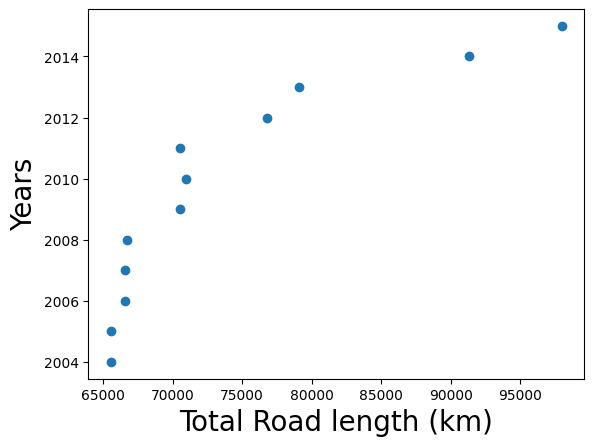

In [111]:
plt.scatter(total , yearsInt)
plt.xlabel("Total Road length (km)", fontsize = 20)
plt.ylabel("Years", fontsize = 20)
plt.show()

In [117]:
x = np.array(yearsInt).reshape(-1, 1)
y = np.array(total)

print(x,y)

[[2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]] [[65569.]
 [65569.]
 [66590.]
 [66590.]
 [66754.]
 [70548.]
 [70934.]
 [70548.]
 [76818.]
 [79116.]
 [91287.]
 [97991.]]


In [133]:
model = LinearRegression().fit(x, y)

print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

years = [[year] for year in range(2016,2026)]

new_x = np.array(years)
predicted_y = model.predict(new_x)
print('Predicted y:')
print(np.array(list(predicted_y)).reshape(-1,1))

Intercept: -5116203.179487177
Slope: 2582.846153846153
Predicted y:
[[ 90814.66666667]
 [ 93397.51282051]
 [ 95980.35897436]
 [ 98563.20512821]
 [101146.05128205]
 [103728.8974359 ]
 [106311.74358974]
 [108894.58974359]
 [111477.43589744]
 [114060.28205128]]


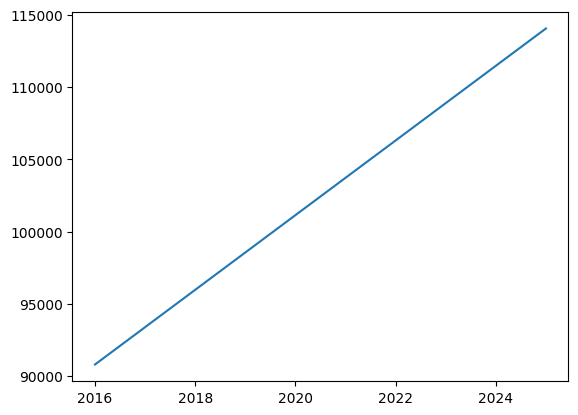

In [136]:
year_x = [year for year in range(2016,2026)]
# print(list(predicted_y))

plt.plot(year_x , list(predicted_y))

In [125]:
lengthOfNH = lengthOfNH.drop("Unnamed: 0", axis=1)

lengthOfNH = lengthOfNH.set_index("States/UTs").transpose()

years_to_predict = np.array(range(2016, 2026)).reshape(-1, 1)

predictions = {}
for state in lengthOfNH.columns:
    X = lengthOfNH.index.values.astype(int).reshape(-1, 1)
    y = lengthOfNH[state].values
    
    mask = ~np.isnan(y)
    X = X[mask]
    y = y[mask]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{state} - MSE: {mse}")

    future_road_lengths = model.predict(years_to_predict)
    predictions[state] = future_road_lengths

predictions_df = pd.DataFrame(predictions, index=years_to_predict.flatten())
predictions_df.to_csv("road_lengths_predictions.csv", index_label="Year")


Andhra Pradesh - MSE: 1366817.758221239
Arunachal Pradesh - MSE: 180979.35757702624
Assam - MSE: 87581.90988629863
Bihar - MSE: 34131.07288448571
Chhattisgarh - MSE: 99353.25581155608
Goa - MSE: 7.029129344693782
Gujarat - MSE: 109217.39450883905
Haryana - MSE: 34593.01641516553
Himachal Pradesh - MSE: 93356.80571637709
Jammu & Kashmir - MSE: 59767.208909425295
Jharkhand - MSE: 184519.79290466328
Karnataka - MSE: 424564.18280222017
Kerala - MSE: 11329.511000228502
Madhya Pradesh - MSE: 85201.67085790877
Maharashtra - MSE: 596122.7973273564
Manipur - MSE: 19361.941288767903
Meghalaya - MSE: 12807.26792104844
Mizoram - MSE: 9992.146198099575
Nagaland - MSE: 25392.784879789124
Odisha - MSE: 119275.34064686678
Punjab - MSE: 43867.930630547235
Rajasthan - MSE: 324249.6349820081
Sikkim - MSE: 2880.4142960063223
Tamil Nadu - MSE: 3893.6468990237336
Tripura - MSE: 2562.4397282649466
Uttarakhand - MSE: 55260.46302654048
Uttar Pradesh - MSE: 89127.19675313681
West Bengal - MSE: 6499.451806538549